# Machine Learning - Decision Trees

> Heuristics for learning decision trees and their theoretical properties. 

- hide: false
- toc: true
- badges: true
- comments: false
- categories: ['Machine Learning','Decision Trees','Random Forests']

# Introduction

## Classification vs. Regression

We start our discussion of decision trees with a definition of *classification* and *classifier*.

> Definition: &nbsp; **Classification** is the process of grouping data into discrete categories (i.e. **class labels**).
<br>

We may contrast this definition with *regression* which is the process of predicting a *continous* (i.e. real or complex-valued) output. 

A common example of a classification problem is the sorting of emails into the binary categories of *'spam'* and *'not spam'*. However, the labels in a classification problem need not be binary — they may be any discrete set. Whereas a common example of regression is learning a linear (or a non-linear) function that best fits a given dataset. 

> Note: The line between classification and regression is sometimes blurred. For instance, *logistic regression* is a regression algorithm which outputs a prediction in the continous probability range $[0,1]$. It's commonly used with a *decision rule* which casts its output into discrete classes. Thus, even though it's a regression algorithm, it can easily be converted into a classification algorithm and is often used for classification problems in practice.
<br>

This leads us to the expected definition of a classifier, which is:

> Definition: &nbsp; A **classifier** is any algorithm that performs classification.
<br>

## Decision Trees

*Decision trees* are one type of classifier among many. 

The nodes of a decision tree correspond to the *features* of the dataset and its leaves correspond to the class labels. The paths in a decision tree corrspond to the *conjunction of features* that lead to the class labels at its leaves.

To understand this, let's look at an example of a non-binary decision tree that's nonetheless very easy to understand because of the historical context of the data it's attempting to learn. 

**Example:**

\[INSERT PICTURE HERE\]

The above decision tree has identified three features that best predict the chances of a given passanger of the Titanic to survive. These three features, in order of their effect on the accuracy of the prediction, are *sex*, *age*, and *sibsp* (which is the number of siblings or spouses).

As we can infer from the tree, were you a passanger on the Titanic, you would've likely survived if you were either female or a male child (below the age of 9.5) with less than 3 siblings (a conjunction of features).

The decision tree was fit successfuly.


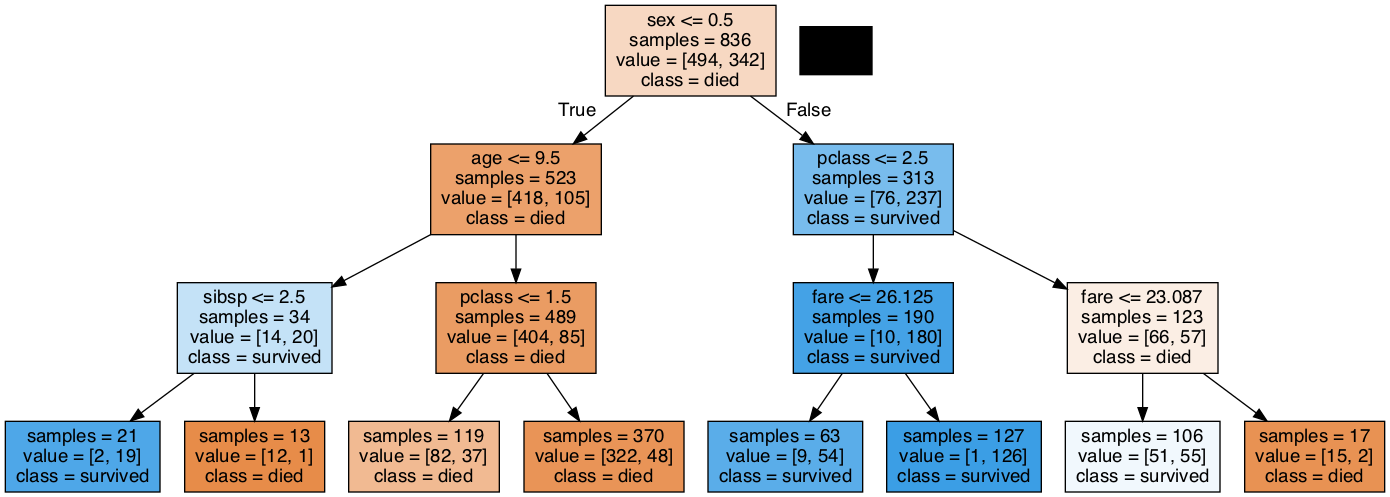

In [28]:
# Imports
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image

# Setting random state for replicability of results
RANDOM_STATE = 2022

# Fetching data as features and labels from OpenML as a Pandas dataframe
X, y = fetch_openml("titanic", version = 1, as_frame = True, return_X_y = True)

# Cleaning and engineering data:
# Dropping unnecessary columns and those with too many missing values...
X.drop(columns = ['boat', 'body', 'home.dest', 'cabin', 'ticket', 'name', 'embarked'], inplace = True)
# Dropping data points (i.e. rows) with any missing values and subseting labels accordingly
X['labels'] = y # Temporarily adding labels to data as a column
X.dropna(inplace = True) # Dropping the rows with any null values
y = X['labels'] # Subsetting the labels
X.drop(columns = 'labels', inplace = True) # Dropping the column of labels
# Converting 'male' and 'female' feature values into the Boolean values 0 and 1 respectively
X['sex'] = X['sex'].apply(lambda x: 0 if x == 'male' else 1)

# Splitting data into training and holdout folds for cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2)

# Defining a decision tree classifier
clf = DecisionTreeClassifier(
    random_state = RANDOM_STATE,
    max_depth = 3
)
# Training the decision tree classifier
clf = clf.fit(X_train, y_train)
# Test data on holdout fold
y_pred = clf.predict(X_test)

# Evaluate the predictive power of the decision tree - does it beat randomly guessing?
if (metrics.accuracy_score(y_test, y_pred) > 0.5):
    print('The decision tree was fit successfuly.')
else:
    print('The decision tree failed to fit.')
    
# Visualizing the decision tree
out_png = export_graphviz(
    clf,
    feature_names = X_train.columns,
    class_names = ['died','survived'],
    impurity = False,
    filled = 'True'
)
graph = pydotplus.graph_from_dot_data(out_png)
Image(graph.create_png())

# Setup

## Simplifying Assumptions

In the rest of this article, for simplicity, we will assume binary input and binary output for decision trees. That is, the training set is  ${S = \{(x^1,y^1), ... ,(x^k, y^k)\}}$ with ${x^i \in \{0,1\}^n}$ and ${y^i \in \{0,1\} \ \ \forall i}$. This means that the decision tree itself is simply a binary function which also receives binary input. 

The task is to learn this function.

## Potential Function